## Data  Set





Our data set was crawled down from Google Baidu by team members according to their favorite celebrities, while BMI, weight, height and other data were obtained from public news and CSV files were formed. Since a person's weight and height are variable at any time, this function can only be used as an auxiliary reference to measure BMI.


In [42]:
## Input the Data

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from pathlib import Path as p

In [44]:
data_label = "./Famous person data - Sheet1.csv"

In [45]:
folder = "photo"

In [46]:
from glob import glob
photo_files = glob("photo/*")

select_jpgs = ([img for img in photo_files if ".jpg" in img or ".jpeg" in img or "JPG" in img])

print("Total {} photos ".format(len(select_jpgs)))

Total 342 photos 


In [47]:
id_path = [(p(images).stem[:(index_number(p(images).stem))],images) for  images in select_jpgs ]

In [48]:
def index_number(string):
    match = re.search("\d", p(string).stem)
    return match.start(0)

In [60]:
data_csv = pd.read_csv(data_label)

In [54]:
height_weight = pd.DataFrame(id_path,columns=['name','path'])

In [61]:
data = pd.merge(height_weight,data_csv) ## merged the training images with their profile

In [62]:
data.head

<bound method NDFrame.head of             UID                    path  id name  height  weight        BMI
0    hongjinbao   photo/hongjinbao9.jpg  11  hjb    1.70     100  34.602076
1    hongjinbao   photo/hongjinbao8.jpg  11  hjb    1.70     100  34.602076
2    hongjinbao   photo/hongjinbao7.jpg  11  hjb    1.70     100  34.602076
3    hongjinbao   photo/hongjinbao4.jpg  11  hjb    1.70     100  34.602076
4    hongjinbao   photo/hongjinbao5.jpg  11  hjb    1.70     100  34.602076
..          ...                     ...  ..  ...     ...     ...        ...
336  meiyanfang  photo/meiyanfang3.jpeg  20  myf    1.68      50  17.715419
337  meiyanfang   photo/meiyanfang5.jpg  20  myf    1.68      50  17.715419
338       qiqin        photo/qiqin2.jpg  22   qq    1.73      62  20.715694
339       qiqin        photo/qiqin1.jpg  22   qq    1.73      62  20.715694
340       qiqin       photo/qiqin3.jpeg  22   qq    1.73      62  20.715694

[341 rows x 7 columns]>

## Face detection

In [63]:
!pip install face_recognition
import face_recognition

     |████████████████████████████████| 100.2MB 41kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=45f1fffc257c1df9473e41deb7ff4b7f124ed72f84833d99c8b561960fc75f73
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [102]:
def face_detect(image_path):
    print(image_path)
    face_reg = face_recognition.load_image_file(image_path)
    face_code = face_recognition.face_encodings(face_reg)

    if not face_code :
        print("no face")
        return np.zeros(128).tolist()

    return face_code[0].tolist()

In [104]:
detected_photo = []

In [105]:
for images in data.path:
    face_code = face_detect(images)
    detected_photo.append(face_code)

photo/hongjinbao9.jpg
photo/hongjinbao8.jpg
photo/hongjinbao7.jpg
photo/hongjinbao4.jpg
photo/hongjinbao5.jpg
photo/hongjinbao1.jpg
photo/hongjinbao3.jpg
photo/hongjinbao6.jpg
photo/hongjinbao2.jpg
photo/emma6.jpg
photo/emma4.jpg
photo/emma2.jpg
photo/emma3.jpg
photo/emma5.jpg
photo/emma1.jpg
photo/chenjieyi11.jpg
photo/chenjieyi12.jpg
photo/chenjieyi16.jpg
photo/chenjieyi18.jpg
photo/chenjieyi8.jpg
photo/chenjieyi6.jpg
photo/chenjieyi4.jpg
photo/chenjieyi14.jpg
photo/chenjieyi3.jpg
photo/chenjieyi5.jpg
photo/chenjieyi1.jpg
photo/chenjieyi19.jpg
photo/chenjieyi7.jpg
photo/chenjieyi2.jpg
photo/chenjieyi10.jpg
photo/chenjieyi15.jpg
photo/chenjieyi17.jpg
photo/chenjieyi9.jpg
photo/chenjieyi13.jpeg
photo/srk2.jpg
photo/srk6.jpg
photo/srk4.jpg
photo/srk11.jpg
photo/srk8.jpg
photo/srk13.jpg
photo/srk5.jpg
photo/srk3.jpeg
no face
photo/srk9.jpg
photo/srk12.jpg
photo/srk1.jpg
photo/srk10.jpeg
photo/srk7.jpg
photo/ben2.jpg
photo/ben5.jpg
photo/ben1.jpg
photo/ben4.jpg
photo/ben3.jpg
photo/guofuc

In [106]:
X = np.array(detected_photo) ## This is the training data matrix

In [107]:

y_height = data.height.values ## all labels
y_weight = data.weight.values
y_BMI = data.BMI.values

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_height_train, y_height_test, y_weight_train, y_weight_test ,y_BMI_train, y_BMI_test = train_test_split(X, y_height,y_weight,y_BMI, random_state=1)

## Measurement

In [124]:
def report_goodness(model,X_test,y_test,predictor_log=True):
    # Make predictions using the testing set
    y_pred = model.predict(X_test)
    y_true = y_test
    if predictor_log:
        y_true = np.log(y_test)
    # The coefficients
    # The mean squared error
    print("Mean squared error: %.2f"      % mean_squared_error(y_true, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_true, y_pred))
    
    errors = abs(y_pred - y_true)
    mape = 100 * np.mean(errors / y_true)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

## Model selection 



In [125]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

## Height

In [164]:
from sklearn import  linear_model
model_height = linear_model.LinearRegression()
model_height = model_height.fit(X_train,np.log(y_height_train))
report_goodness(model_height,X_test,y_height_test)

Mean squared error: 0.76
Variance score: 0.21
Model Performance
Average Error: 0.6836 degrees.
Accuracy = -16.81%.


In [166]:
from sklearn.ensemble import BaggingRegressor
model_height = BaggingRegressor()
model_height = model_height.fit(X_train,np.log(y_height_train))
report_goodness(model_height,X_test,y_height_test)

Mean squared error: 0.56
Variance score: 0.42
Model Performance
Average Error: 0.3378 degrees.
Accuracy = 55.82%.


In [167]:
from sklearn import ensemble
model_height = ensemble.GradientBoostingRegressor(n_estimators=100)#这里使用100个决策树
model_height = model_height.fit(X_train,np.log(y_height_train))
report_goodness(model_height,X_test,y_height_test)

Mean squared error: 0.49
Variance score: 0.49
Model Performance
Average Error: 0.2451 degrees.
Accuracy = 68.79%.


In [168]:
from sklearn import ensemble
model_height = ensemble.AdaBoostRegressor(n_estimators=50)#这里使用50个决策树
model_height = model_height.fit(X_train,np.log(y_height_train))
report_goodness(model_height,X_test,y_height_test)

Mean squared error: 0.24
Variance score: 0.75
Model Performance
Average Error: 0.0825 degrees.
Accuracy = 93.65%.


In [169]:
from sklearn.linear_model import Ridge
model_height = Ridge(fit_intercept=True, alpha=0.0015, random_state=4, normalize=True)
model_height = model_height.fit(X_train,np.log(y_height_train))
report_goodness(model_height,X_test,y_height_test)

Mean squared error: 0.61
Variance score: 0.37
Model Performance
Average Error: 0.5955 degrees.
Accuracy = 1.27%.


In [170]:
from sklearn.ensemble import RandomForestRegressor
model_height = RandomForestRegressor(max_depth=2, random_state=0,
                             n_estimators=100)
model_height = model_height.fit(X_train,np.log(y_height_train))
report_goodness(model_height,X_test,y_height_test)

Mean squared error: 0.53
Variance score: 0.45
Model Performance
Average Error: 0.3433 degrees.
Accuracy = 54.97%.


In [173]:
from sklearn.kernel_ridge import KernelRidge
model_height = KernelRidge(kernel='rbf', gamma=0.21,alpha=0.0017)
model_height = model_height.fit(X_train,np.log(y_height_train))
report_goodness(model_height,X_test,y_height_test)

Mean squared error: 0.17
Variance score: 0.82
Model Performance
Average Error: 0.2731 degrees.
Accuracy = 56.79%.


## Weight

In [181]:
from sklearn import  linear_model
model_weight = linear_model.LinearRegression()
model_weight = model_weight.fit(X_train,np.log(y_weight_train))
report_goodness(model_weight,X_test,y_weight_test)

Mean squared error: 0.01
Variance score: 0.80
Model Performance
Average Error: 0.0822 degrees.
Accuracy = 98.02%.


In [182]:
from sklearn.ensemble import BaggingRegressor
model_weight = BaggingRegressor()
model_weight = model_weight.fit(X_train,np.log(y_weight_train))
report_goodness(model_weight,X_test,y_weight_test)

Mean squared error: 0.02
Variance score: 0.66
Model Performance
Average Error: 0.0967 degrees.
Accuracy = 97.68%.


In [183]:
from sklearn import ensemble
model_weight = ensemble.GradientBoostingRegressor(n_estimators=100)#这里使用100个决策树
model_weight = model_weight.fit(X_train,np.log(y_weight_train))
report_goodness(model_weight,X_test,y_weight_test)

Mean squared error: 0.01
Variance score: 0.78
Model Performance
Average Error: 0.0781 degrees.
Accuracy = 98.13%.


In [184]:
from sklearn import ensemble
model_weight = ensemble.AdaBoostRegressor(n_estimators=50)#这里使用50个决策树
model_weight = model_weight.fit(X_train,np.log(y_weight_train))
report_goodness(model_weight,X_test,y_weight_test)

Mean squared error: 0.02
Variance score: 0.71
Model Performance
Average Error: 0.0957 degrees.
Accuracy = 97.69%.


In [185]:
from sklearn.linear_model import Ridge
model_weight = Ridge(fit_intercept=True, alpha=0.0015, random_state=4, normalize=True)
model_weight = model_weight.fit(X_train,np.log(y_weight_train))
report_goodness(model_weight,X_test,y_weight_test)

Mean squared error: 0.01
Variance score: 0.76
Model Performance
Average Error: 0.0866 degrees.
Accuracy = 97.92%.


In [188]:
from sklearn.ensemble import RandomForestRegressor
model_weight = RandomForestRegressor(max_depth=2, random_state=0,
                             n_estimators=100)
model_weight = model_weight.fit(X_train,np.log(y_weight_train))
report_goodness(model_weight,X_test,y_weight_test)

Mean squared error: 0.03
Variance score: 0.51
Model Performance
Average Error: 0.1222 degrees.
Accuracy = 97.07%.


In [189]:
from sklearn.kernel_ridge import KernelRidge
model_weight = KernelRidge(kernel='rbf', gamma=0.21,alpha=0.0017)
model_weight = model_weight.fit(X_train,np.log(y_weight_train))
report_goodness(model_weight,X_test,y_weight_test)

Mean squared error: 0.01
Variance score: 0.87
Model Performance
Average Error: 0.0636 degrees.
Accuracy = 98.46%.


## BMI

In [191]:
model_BMI = BaggingRegressor()
model_BMI = model_BMI.fit(X_train,np.log(y_BMI_train))
report_goodness(model_BMI,X_test,y_BMI_test)

Mean squared error: 0.01
Variance score: 0.60
Model Performance
Average Error: 0.0846 degrees.
Accuracy = 97.29%.


In [192]:
model_BMI = linear_model.LinearRegression()
model_BMI = model_BMI.fit(X_train,np.log(y_BMI_train))
report_goodness(model_BMI,X_test,y_BMI_test)

Mean squared error: 0.02
Variance score: 0.45
Model Performance
Average Error: 0.1029 degrees.
Accuracy = 96.69%.


In [193]:
model_BMI = ensemble.GradientBoostingRegressor(n_estimators=100)#这里使用100个决策树
model_BMI = model_BMI.fit(X_train,np.log(y_BMI_train))
report_goodness(model_BMI,X_test,y_BMI_test)

Mean squared error: 0.01
Variance score: 0.80
Model Performance
Average Error: 0.0654 degrees.
Accuracy = 97.89%.


In [194]:
model_BMI = ensemble.AdaBoostRegressor(n_estimators=50)#这里使用50个决策树
model_BMI = model_BMI.fit(X_train,np.log(y_BMI_train))
report_goodness(model_BMI,X_test,y_BMI_test)

Mean squared error: 0.01
Variance score: 0.76
Model Performance
Average Error: 0.0740 degrees.
Accuracy = 97.59%.


In [195]:
model_BMI = Ridge(fit_intercept=True, alpha=0.0015, random_state=4, normalize=True)
model_BMI = model_BMI.fit(X_train,np.log(y_BMI_train))
report_goodness(model_BMI,X_test,y_BMI_test)

Mean squared error: 0.02
Variance score: 0.50
Model Performance
Average Error: 0.0980 degrees.
Accuracy = 96.85%.


In [196]:
model_BMI = RandomForestRegressor(max_depth=2, random_state=0,
                             n_estimators=100)
model_BMI = model_BMI.fit(X_train,np.log(y_BMI_train))
report_goodness(model_BMI,X_test,y_BMI_test)

Mean squared error: 0.02
Variance score: 0.46
Model Performance
Average Error: 0.1072 degrees.
Accuracy = 96.56%.


In [197]:
model_BMI = KernelRidge(kernel='rbf', gamma=0.21,alpha=0.0017)
model_BMI = model_BMI.fit(X_train,np.log(y_BMI_train))
report_goodness(model_BMI,X_test,y_BMI_test)

Mean squared error: 0.00
Variance score: 0.89
Model Performance
Average Error: 0.0470 degrees.
Accuracy = 98.47%.


Finally we decided to use KernelRidge model, because it s variance score is the highest, which means it can represent more situations.

## save all models 

In [198]:
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


# save the model to disk

In [210]:
height_model = 'weight_predictor.model'
weight_model = 'height_predictor.model'
bmi_model = 'bmi_predictor.model'
joblib.dump(model_height, height_model)
joblib.dump(model_weight, weight_model)
joblib.dump(model_BMI, bmi_model)

['bmi_predictor.model']

# load the model from disk

In [221]:
height_model = 'weight_predictor.model'
weight_model = 'height_predictor.model'
bmi_model = 'bmi_predictor.model'
height_model = joblib.load(height_model)
weight_model = joblib.load(weight_model)
bmi_model = joblib.load(bmi_model)

## test 

In [216]:
def predict_height_width_BMI(test_image,height_model,weight_model,bmi_model):
    test_array = np.expand_dims(np.array(face_detect(test_image)),axis=0)
    height = np.asscalar(np.exp(height_model.predict(test_array)))
    weight = np.asscalar(np.exp(weight_model.predict(test_array)))
    bmi = np.asscalar(np.exp(bmi_model.predict(test_array)))
    return {'height':height,'weight':weight,'bmi':bmi}
    

## prediction on test images

In [213]:
from IPython.display import Image

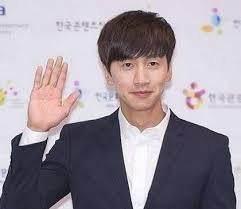

In [ ]:
test_image = 'height_weight_test/23.jpg'
Image(test_image)

In [ ]:
predict_height_width_BMI(test_image,height_model,weight_model,bmi_model)

height_weight_test/23.jpg


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """


{'bmi': 22.57836660894522,
 'height': 1.7430179499953597,
 'weight': 66.88182955016546}

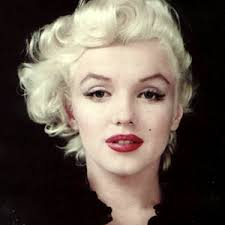

In [222]:
test_image = '12.jpg'
Image(test_image)

In [223]:
predict_height_width_BMI(test_image,height_model,weight_model,bmi_model)

12.jpg


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """


{'bmi': 23.68568111531265,
 'height': 1.7008816567141105,
 'weight': 61.374557499461275}

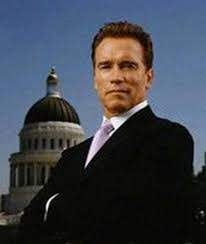

In [224]:
test_image = '11.jpg'
Image(test_image)

In [225]:
predict_height_width_BMI(test_image,height_model,weight_model,bmi_model)

11.jpg


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """


{'bmi': 21.670302908628717,
 'height': 1.8834461043339898,
 'weight': 80.96250277782457}